In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image

In [8]:
def read_image_dimensions(directories):
    """
    Reads all images in the specified directories and returns their dimensions.

    :param directories: A list of paths to the directories containing images.
    :return: A list of tuples containing (width, height) for each image.
    """
    dimensions = []

    for directory in directories:
        print(f"Reading images from directory: {directory}")
        
        # List all files in the directory
        files = os.listdir(directory)
        
        # Filter out only image files
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Iterate through image files and get their dimensions
        for image_file in image_files:
            try:
                # Open the image file
                with Image.open(os.path.join(directory, image_file)) as img:
                    # Get the dimensions
                    width, height = img.size
                    dimensions.append((width, height))
            except Exception as e:
                print(f"Error reading {image_file}: {e}")

    return dimensions


Reading images from directory: /Users/akinakinlabi/Desktop/Masters/207/project/data/train/real
Reading images from directory: /Users/akinakinlabi/Desktop/Masters/207/project/data/train/fake


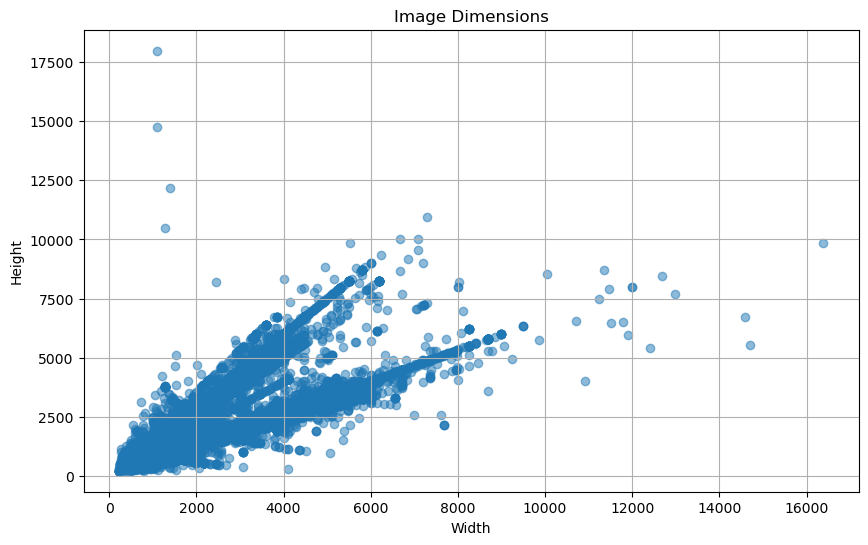

In [9]:
def plot_image_dimensions(dimensions):
    """
    Plots the image dimensions.

    :param dimensions: A list of tuples containing (width, height) for each image.
    """
    widths, heights = zip(*dimensions)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Image Dimensions')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.grid(True)
    plt.show()


directories = ['/Users/akinakinlabi/Desktop/Masters/207/project/data/train/real',
               '/Users/akinakinlabi/Desktop/Masters/207/project/data/train/fake']

dimensions = read_image_dimensions(directories)


plot_image_dimensions(dimensions)

In [12]:
def plot_pixel_intensity_boxplot(directories):
    """
    Plots a boxplot of the median pixel intensities for all images in the specified directories.

    :param directories: A list of paths to the directories containing images.
    """
    median_intensities = []

    for directory in directories:
        print(f"Reading images from directory: {directory}")
        
        # List all files in the directory
        files = os.listdir(directory)
        
        # Filter out only image files
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        # Iterate through image files and calculate the median pixel intensity
        for image_file in image_files:
            try:
                # Open the image file
                with Image.open(os.path.join(directory, image_file)) as img:
                    # Convert to grayscale
                    grayscale_img = img.convert('L')
                    # Flatten the image array
                    pixel_values = np.array(grayscale_img).flatten()
                    # Calculate the median pixel intensity
                    median_intensity = np.median(pixel_values)
                    median_intensities.append(median_intensity)
            except Exception as e:
                print(f"Error reading {image_file}: {e}")

    # Plot the boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(median_intensities, vert=False)
    plt.title('Boxplot of Median Pixel Intensities')
    plt.xlabel('Median Pixel Intensity')
    plt.grid(True)
    plt.show()

Reading images from directory: /Users/akinakinlabi/Desktop/Masters/207/project/data/train/real
Error reading 20964.jpg: image file is truncated (6 bytes not processed)
Error reading 12094.jpg: image file is truncated (6 bytes not processed)
Error reading 21610.jpg: image file is truncated (1 bytes not processed)
Error reading 0038.jpg: image file is truncated (0 bytes not processed)
Error reading 15963.jpg: image file is truncated (2 bytes not processed)
Error reading 16011.jpg: image file is truncated (4 bytes not processed)
Error reading 13021.jpg: image file is truncated (0 bytes not processed)
Reading images from directory: /Users/akinakinlabi/Desktop/Masters/207/project/data/train/fake


/Users/akinakinlabi/opt/anaconda3/envs/tensor_envs/lib/python3.8/site-packages/PIL/Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Error reading 8022.jpg: broken data stream when reading image file
Error reading 12854.jpg: broken data stream when reading image file


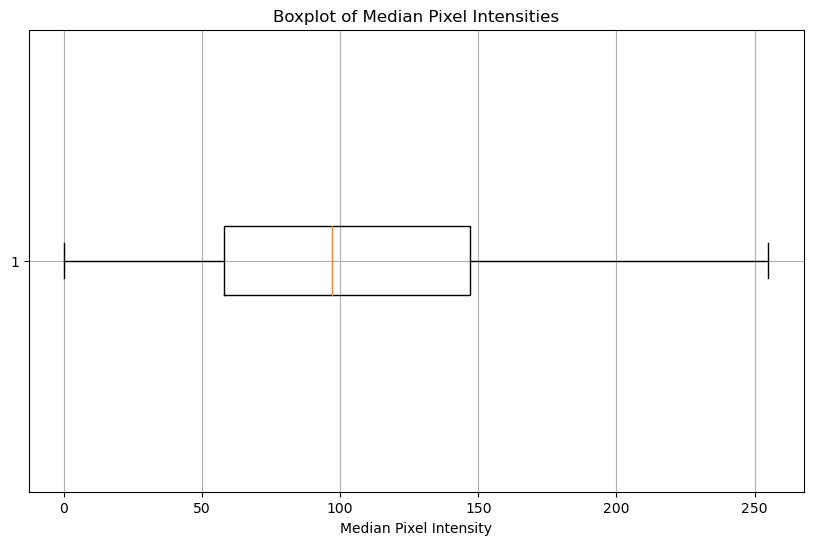

In [13]:
plot_pixel_intensity_boxplot(directories)